# Too Many or Too Few
### Sampling Bounds for Topological Descriptors

#### Authors

#### Link to paper

This [Jupyter](https://jupyter.org/) notebook is an electronic supplementry material of the paper.

## Global package Dependencies

This has been included seperately so that individual experiments may be run independently.

In [3]:
from IPython.display import clear_output, Image
import numpy as np
import time
import rpy2.rinterface
import random
%load_ext rpy2.ipython

## Preprocessing
#### The following code will download the MPEG7/EMNIST data and create and store the data in the appropriate folders. 
You can find the MPEG7 data at: http://www.dabi.temple.edu/~shape/MPEG7
    
You can find the EMNIST data at: https://www.nist.gov/itl/products-and-services/emnist-dataset

Note: All steps in this subsection must run before any of the experiments may run.

#### Create folders and download data.

In [5]:
from utils.get_data import preprocess_data, dir_list
from IPython.display import clear_output


preprocess_data(dir_list)

#Clear output when done creating graphs
clear_output()

#### Create the graphs for random point clouds

In [6]:
from utils.build_graphs import randpts_graphs
from IPython.display import clear_output
import random


# make sure we have the same seeds as main experiments
random.seed(423652346)
np.random.seed(423652346)

randpts_graphs()

#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

#### Create the graphs for MPEG7 data

In [7]:
from utils.build_graphs import mpeg7_graphs
from IPython.display import clear_output

#Change eps according to how close we want the approx
eps = .001
#Change to corresponding eps 
graphs_dir = "graphs_001_approx" 
mpeg7_graphs(eps, graphs_dir)



eps = .005
graphs_dir = "graphs_005_approx" 
mpeg7_graphs(eps, graphs_dir)


#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

#### Create the graphs for EMNIST data

In [7]:
from utils.build_graphs import mnist_graphs
from IPython.display import clear_output

#Change eps according to how close we want the approx
eps = .001

#Change to corresponding eps 
graphs_dir = "graphs_001_approx" 

mnist_graphs(eps, graphs_dir)

#Change eps according to how close we want the approx
eps = .005
#Change to corresponding eps 
graphs_dir = "graphs_005_approx" 

mnist_graphs(eps, graphs_dir)

#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

## Experiments

### Section 4.2 - Smallest Stratum Experiment

This section begins by implementing the experiment for section 4.2 with an epsilon value for our image discritization of 0.001. This has the same behavior as running:

```python exp_handler.py --epsilon .001 --experiment 1 --data 4```

On the command line.

In [1]:
from exp_handler import get_exp_graphs, exp
import utils.vertex
from tqdm import tqdm
import numpy as np
import time
import random

# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 1

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
  
  exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")
  



Experiment Progress: 100%|█████████████████| 8186/8186 [00:37<00:00, 218.15it/s]

Complete


In [2]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "001"
#edit 01/22/2024 change directory name
rando("smallest_stratum_exp",approx,"angle_stats")
mpeg7_mnist("mpeg7","smallest_stratum_exp", approx, "angle_stats")
mpeg7_mnist("mnist","smallest_stratum_exp", approx, "angle_stats")

In [3]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/smallest_angle_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")
approx <- "001"
random <- get_exp_files(approx,"smallest_stratum_exp", "random")
mnist <- get_exp_files(approx,"smallest_stratum_exp", "mnist")
mpeg7 <- get_exp_files(approx,"smallest_stratum_exp", "mpeg7")

perform_smallest_angle_analysis(random,mnist,mpeg7,approx)


UsageError: Cell magic `%%R` not found.


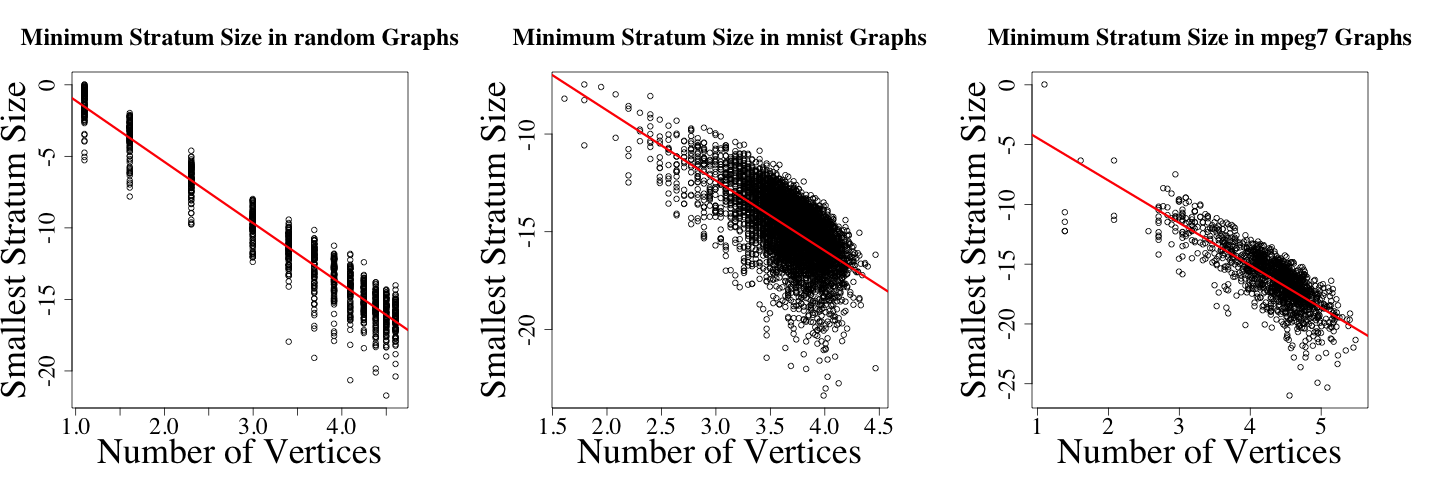

In [2]:
from utils.combine_data import combine_pngs
from PIL import Image

approx = '001'
combine_pngs('smallest_stratum_exp', approx)
Image.open("figs/smallest_stratum_exp/smallest_stratum_exp_001.png")

We continue with the experiment for section 4.2 with an epsilon value for our image discritization of 0.005. This has the same behavior as running:

```python exp_handler.py --epsilon 005 --experiment 1 --data 4```

On the command line.

In [6]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import numpy as np
import time
import random

# modify for that approximation type for emnist and mpeg7
# when running exp_handler as a script theseare set using a command line argument
# choices include graphs_001_approx and graphs_005_approx
# command line argument relies only on an epsilon value
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 for smallest angle experiment (smallest_angle_exp)
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 1

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")



Experiment Progress: 100%|███████████| 8301/8301 [00:25<00:00, 325.48it/s]

Complete


In [7]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "005"
rando("smallest_stratum_exp",approx,"angle_stats")
mpeg7_mnist("mpeg7","smallest_stratum_exp", approx, "angle_stats")
mpeg7_mnist("mnist","smallest_stratum_exp", approx, "angle_stats")

In [8]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/smallest_angle_exp/*/
# Graphs show:
#   x-axis: number of vertices
#   y-axis: the ratio number of generated stratum using smallest size/number of
#		stratum
# Creates both pdf and png files

#source("plotting-code/analysis_001_approx-smallest_angle_exp-smallest_angle_graphs.R")
#smallest_angle_exp_stat_001()

#data <- get_smallest_angle_exp_files("001","smallest_angle_exp", "angle_stats")
#perform_analysis(data)
source("utils/analysis.R")
approx <- "005"
random <- get_exp_files(approx,"smallest_stratum_exp", "random")
mnist <- get_exp_files(approx,"smallest_stratum_exp", "mnist")
mpeg7 <- get_exp_files(approx,"smallest_stratum_exp", "mpeg7")

perform_smallest_angle_analysis(random,mnist,mpeg7,approx)


UsageError: Cell magic `%%R` not found.


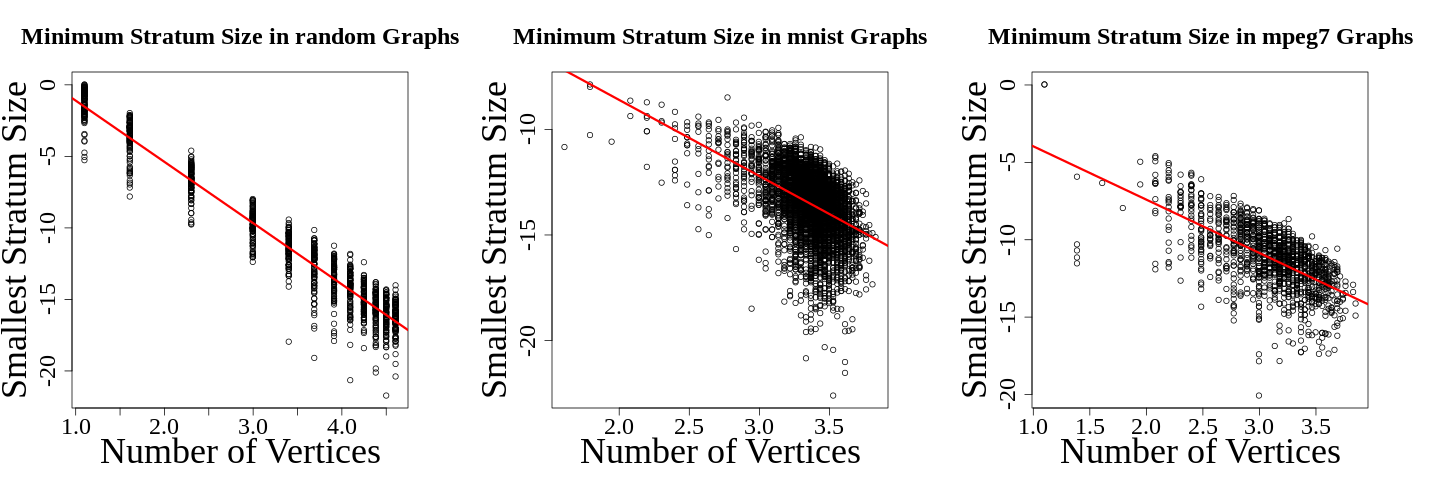

In [12]:
from utils.combine_data import combine_pngs
from PIL import Image
approx = '005'
combine_pngs('smallest_stratum_exp', approx)
Image.open("figs/smallest_stratum_exp/smallest_stratum_exp_005.png")

## Section 4.3 - Constant Size Discretization

We now move on to the experiment for section 4.3 with an epsilon value for our image discritization of 0.001. This has the same behavior as running:

```python exp_handler.py --epsilon .001 --experiment 2 --data 4```

On the command line.

In [5]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
import numpy as np
import time


# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 2

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")


#Clear output when done running experiment
clear_output()

In [6]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "001"
rando("uniform_sample_exp",approx,"sample_stats")
mpeg7_mnist("mpeg7","uniform_sample_exp", approx, "sample_stats")
mpeg7_mnist("mnist","uniform_sample_exp", approx, "sample_stats")

In [17]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/uniform_sample_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")
approx <- "001"
random <- get_exp_files(approx,"uniform_sample_exp", "random")
mnist <- get_exp_files(approx,"uniform_sample_exp", "mnist")
mpeg7 <- get_exp_files(approx,"uniform_sample_exp", "mpeg7")

perform_uniform_sample_analysis(random,mnist,mpeg7, approx)

[1] "Length"
[1] 900
[1] "MSE"
[1] "Length"
[1] 5566
[1] "MSE"
[1] "Length"
[1] 531
[1] "MSE"
[1] "Length"
[1] 900
[1] "MSE"
[1] "Length"
[1] 5566
[1] "MSE"
[1] "Length"
[1] 531
[1] "MSE"
[1] "Best Fit Summary RANDPTS"

Call:
lm(formula = ratio ~ poly(in_file$n, 2))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0299978 -0.0023590 -0.0002542  0.0026131  0.0192476 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.956464   0.000204  4688.1   <2e-16 ***
poly(in_file$n, 2)1 -1.347025   0.006121  -220.1   <2e-16 ***
poly(in_file$n, 2)2 -0.314594   0.006121   -51.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006121 on 897 degrees of freedom
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.9827 
F-statistic: 2.554e+04 on 2 and 897 DF,  p-value: < 2.2e-16

[1] "Best Fit Summary MNIST"

Call:
lm(formula = ratio ~ in_file$n)

Residuals:
      Min        1Q

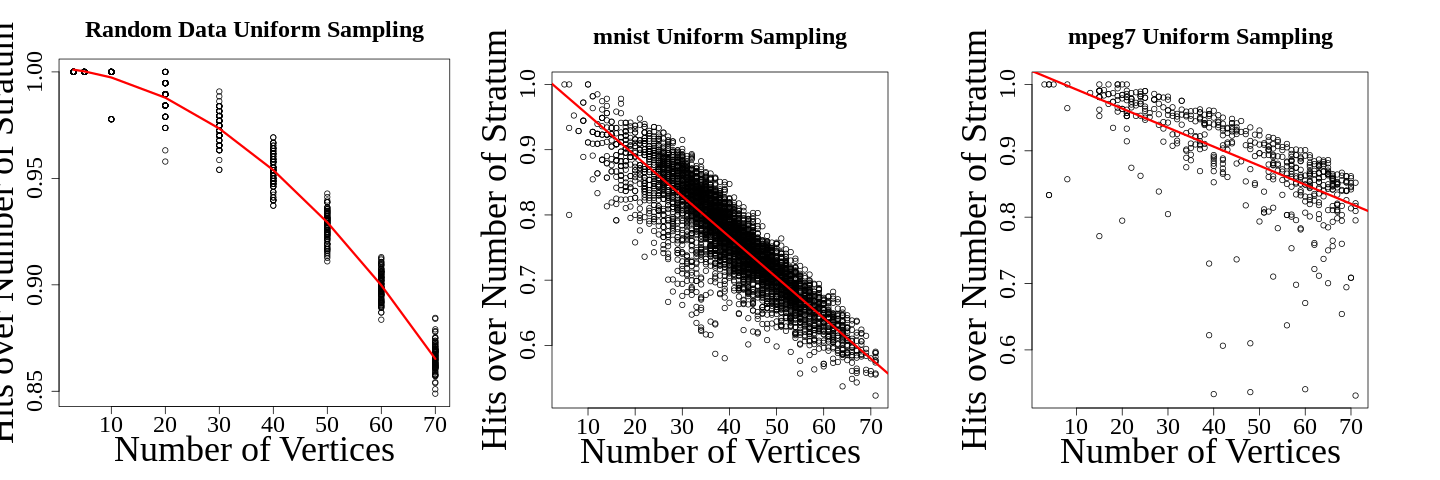

In [5]:
from utils.combine_data import combine_pngs
from PIL import Image
approx = "001"
combine_pngs('uniform_sample_exp', approx)
Image.open("figs/uniform_sample_exp/uniform_sample_exp_001.png")

And, here we have the .005 discretization, equivalent to running:

```python exp_handler.py --epsilon .005 --experiment 2 --data 4```

On the command line

In [6]:
from exp_handler import get_exp_graphs, exp
import random
import numpy as np
import time
from tqdm import tqdm
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 2

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")


Experiment Progress:   0%|            | 3/8301 [00:18<14:12:23,  6.16s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/home/maksym/anaconda3/envs/topo-v1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_180230/2907044556.py", line 38, in <module>
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  File "/home/maksym/Desktop/CompTAG/topo-descriptor-experiments/exp_handler.py", line 199, in exp
    uniform_sample_experiment(G, arcs, sample_sizes, output_file, out_graphs_dir)
  File "/home/maksym/Desktop/CompTAG/topo-descriptor-experiments/exp_handler.py", line -1, in uniform_sample_experiment
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/maksym/anaconda3/envs/topo-v1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [7]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "005"
rando("uniform_sample_exp",approx,"sample_stats")
mpeg7_mnist("mpeg7","uniform_sample_exp", approx, "sample_stats")
mpeg7_mnist("mnist","uniform_sample_exp", approx, "sample_stats")

In [21]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/uniform_sample_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")

approx <- "005"
random <- get_exp_files(approx,"uniform_sample_exp", "random")
mnist <- get_exp_files(approx,"uniform_sample_exp", "mnist")
mpeg7 <- get_exp_files(approx,"uniform_sample_exp", "mpeg7")

perform_uniform_sample_analysis(random,mnist,mpeg7, approx)

[1] "Length"
[1] 900
[1] "MSE"
[1] "Length"
[1] 5751
[1] "MSE"
[1] "Length"
[1] 1356
[1] "MSE"
[1] "Length"
[1] 900
[1] "MSE"
[1] "Length"
[1] 5751
[1] "MSE"
[1] "Length"
[1] 1356
[1] "MSE"
[1] "Best Fit Summary RANDPTS"

Call:
lm(formula = ratio ~ poly(in_file$n, 2))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0299978 -0.0023590 -0.0002542  0.0026131  0.0192476 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.956464   0.000204  4688.1   <2e-16 ***
poly(in_file$n, 2)1 -1.347025   0.006121  -220.1   <2e-16 ***
poly(in_file$n, 2)2 -0.314594   0.006121   -51.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006121 on 897 degrees of freedom
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.9827 
F-statistic: 2.554e+04 on 2 and 897 DF,  p-value: < 2.2e-16

[1] "Best Fit Summary MNIST"

Call:
lm(formula = ratio ~ in_file$n)

Residuals:
      Min        

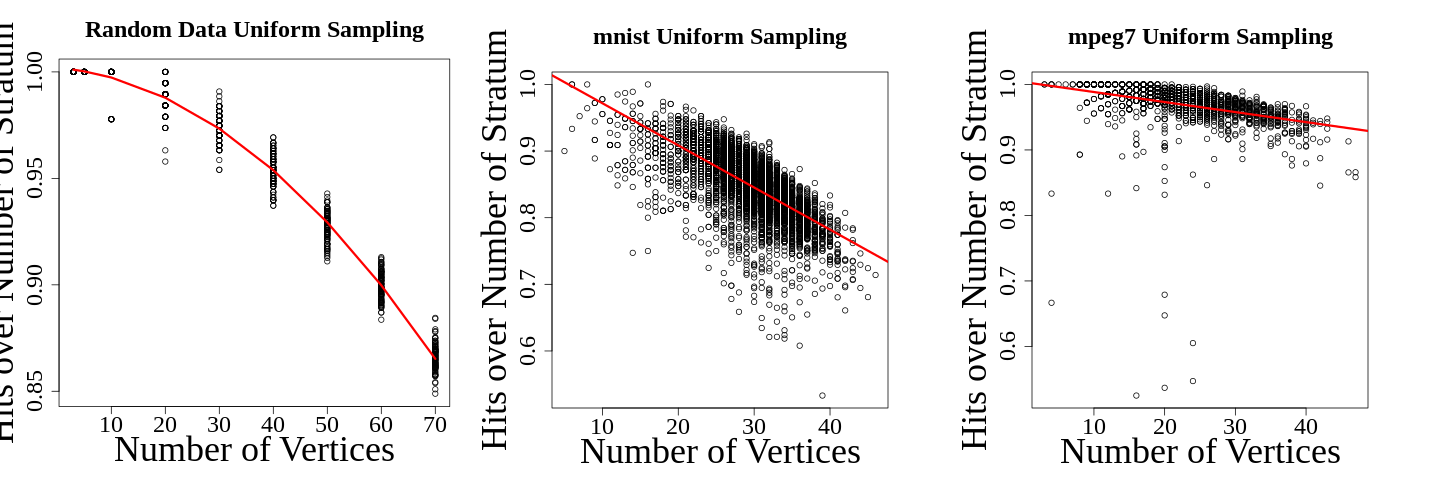

In [10]:
from utils.combine_data import combine_pngs
from PIL import Image
approx = "005"
combine_pngs('uniform_sample_exp', approx)
Image.open("figs/uniform_sample_exp/uniform_sample_exp_005.png")

## Delta Experiment

This first cell the experiment for section 4.5 with epsilon = .001 and the mpeg7 data set, and is the same as running:

```python exp_handler.py --epsilon 001 --experiment 4 --data 2```

In [11]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 2

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

Experiment Progress: 100%|████████████| 1388/1388 [00:33<00:00, 40.91it/s]

Complete


Below is also the epsilon = .001 approximation, for emnist data.

```python exp_handler.py --epsilon 001 --experiment 4 --data 3```

In [12]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 3

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

Experiment Progress: 100%|███████████| 5581/5581 [00:26<00:00, 209.09it/s]

Complete


Here we plot results for these two experiments

In [25]:
%%R

# Reads data from output/distribution_exp/*/
# Generates graphs in figs/distribution_exp/*/
# Graphs show:
#		x-axis: number of stratum
#		y-axis: average stratum size


mnist_file <- read.table(("output_001_approx/delta_exp/mnist/deltas.txt"), header=TRUE, sep=",")

mpeg7_file <- read.table(("output_001_approx/delta_exp/mpeg7/deltas.txt"), header=TRUE, sep=",")



pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_001.pdf")
par(mar=c(5, 5, 5, 5))
hist(mnist_file$delta,ylab="Number of Graphs",xlab="size (radians)",main="",family="serif",cex.lab=3, cex.main=2,cex.sub=2,cex.axis=2)
print("Min delta for MNIST")
print(min(mnist_file$delta))
print("Max delta for MNIST")
print(max(mnist_file$delta))
print("Total number of graphs")
print(length(mnist_file$n))
print(summary(mnist_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_001.pdf")
par(mar=c(5, 5, 5, 5))
hist(mpeg7_file$delta,ylab="Number of Graphs",xlab="size (radians)",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
print("Min delta for MPEG7")
print(min(mpeg7_file$delta))
print("Max delta for MPEG7")
print(max(mpeg7_file$delta))
print("Total number of graphs")
print(length(mpeg7_file$n))
print(summary(mpeg7_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_plot_001.pdf")
par(mar=c(5, 5, 5, 5))
plot(mnist_file$n, mnist_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_plot_001.pdf")
par(mar=c(5, 5, 5, 5))
plot(mpeg7_file$n, mpeg7_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()

[1] "Min delta for MNIST"
[1] 0.7492997
[1] "Max delta for MNIST"
[1] 0.7857164
[1] "Total number of graphs"
[1] 5532
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7493  0.7630  0.7666  0.7665  0.7702  0.7857 
[1] "Min delta for MPEG7"
[1] 0.02240629
[1] "Max delta for MPEG7"
[1] 2.086767
[1] "Total number of graphs"
[1] 1388
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02241 0.10025 0.14206 0.18635 0.20016 2.08677 
png 
  2 


In [13]:

from IPython.display import IFrame
IFrame("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_001.pdf", width = 500, height =500)



In [14]:
IFrame("figs/delta_exp_figs/mnist/mnist_delta_exp_001.pdf", width = 500, height =500)

We now repeat the process for epsilon = 005.

```python exp_handler.py --epsilon 005 --experiment 4 --data 2```

In [15]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 2

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

Experiment Progress: 100%|███████████| 1356/1356 [00:02<00:00, 585.16it/s]

Complete


Below is also the epsilon = .005 approximation, for emnist data.

```python exp_handler.py --epsilon 005 --experiment 4 --data 3```

In [16]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 3

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

Experiment Progress: 100%|███████████| 5745/5745 [00:13<00:00, 428.54it/s]

Complete


In [42]:
%%R

# Reads data from output/distribution_exp/*/
# Generates graphs in figs/distribution_exp/*/
# Graphs show:
#		x-axis: number of stratum
#		y-axis: average stratum size


mnist_file <- read.table(("output_005_approx/delta_exp/mnist/deltas.txt"), header=TRUE, sep=",")

mpeg7_file <- read.table(("output_005_approx/delta_exp/mpeg7/deltas.txt"), header=TRUE, sep=",")



pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_005.pdf")
par(mar=c(5, 5, 5, 5))
hist(mnist_file$delta,ylab="Number of Graphs",xlab="size (radians)",main="",family="serif",cex.lab=3, cex.main=2,cex.sub=2,cex.axis=2)
print("Min delta for MNIST")
print(min(mnist_file$delta))
print("Max delta for MNIST")
print(max(mnist_file$delta))
print("Total number of graphs")
print(length(mnist_file$n))
print(summary(mnist_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_005.pdf")
par(mar=c(5, 5, 5, 5))
hist(mpeg7_file$delta,ylab="Number of Graphs",xlab="size (radians)",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
print("Min delta for MPEG7")
print(min(mpeg7_file$delta))
print("Max delta for MPEG7")
print(max(mpeg7_file$delta))
print("Total number of graphs")
print(length(mpeg7_file$n))
print(summary(mpeg7_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_plot_005.pdf")
par(mar=c(5, 5, 5, 5))
plot(mnist_file$n, mnist_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_plot_005.pdf")
par(mar=c(5, 5, 5, 5))
plot(mpeg7_file$n, mpeg7_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()


[1] "Min delta for MNIST"
[1] 0.1427394
[1] "Max delta for MNIST"
[1] 0.7887447
[1] "Total number of graphs"
[1] 5751
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1427  0.3250  0.4600  0.4756  0.5838  0.7887 
[1] "Min delta for MPEG7"
[1] 0.0417635
[1] "Max delta for MPEG7"
[1] 2.3233
[1] "Total number of graphs"
[1] 1356
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04176 0.22481 0.29961 0.36996 0.38926 2.32330 
png 
  2 


In [17]:
IFrame("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_005.pdf", width = 500, height =500)


In [18]:
IFrame("figs/delta_exp_figs/mnist/mnist_delta_exp_005.pdf", width = 500, height =500)
